In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import shock_tube
from fvhoe.romain_solver import cons_to_prim, weno
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

Toro test 1

In [2]:
N = 100
p = 0
cfl = 0.8
riemann_solver = "hllc"

In [3]:
u = weno(
    tend=0.2,
    n=N,
    cfl=cfl,
    ic_type="toro test1",
    bc_type="free",
    riemann_solver=riemann_solver,
    time=p + 1,
    space=p + 1,
)

solver = EulerSolver(
    w0=partial(
        shock_tube,
        shock_position=0.3,
        rho1_rho2=(1, 0.125),
        v1_v2=(0.75, 0),
        P1_P2=(1, 0.1),
    ),
    CFL=cfl,
    nx=N,
    px=p,
    riemann_solver=riemann_solver,
    bc=BoundaryCondition(x="free"),
    gamma=1.4,
)
solver.rkorder(0.2, exact=True)

cell= 100  itermax= 100000
Done  67 0.20027533976989706


100%|██████████| 0.2/0.2 [00:00]                  


t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.20, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.20, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.20, x=[0.01, 0.99], y=0.50, z=0.50


Text(0.5, 0, '$x$')

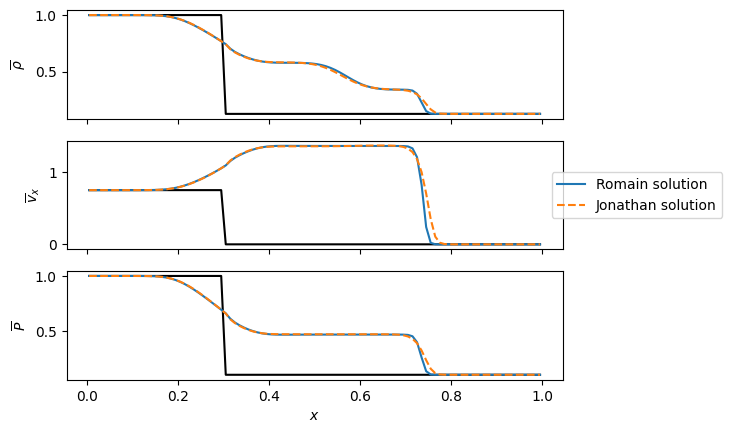

In [4]:
fig, ax = plt.subplots(3, sharex=True)

w = cons_to_prim(u[-1])

for i, (var, label) in enumerate(
    zip(
        ["rho", "vx", "P"],
        [r"$\overline{\rho}$", r"$\overline{v}_x$", r"$\overline{P}$"],
    )
):
    solver.plot_1d_slice(ax[i], t=0, color="k", param=var, y=0.5, z=0.5)
    x = (np.arange(u.shape[2]) + 0.5) / u.shape[2]
    ax[i].plot(x, w[i], label="Romain solution")
    solver.plot_1d_slice(
        ax[i],
        t=0.2,
        param=var,
        y=0.5,
        z=0.5,
        label=r"Jonathan solution",
        linestyle="--",
    )
    ax[i].set_ylabel(label)

ax[1].legend(loc="center", bbox_to_anchor=(1.15, 0.5))
ax[2].set_xlabel("$x$")

In [5]:
print(f"Romain   t=0.0 mass: {np.sum(cons_to_prim(u[0, :])[0]) * solver.h[0]}")
print(f"Romain   t=0.2 mass: {np.sum(cons_to_prim(u[-1, :])[0]) * solver.h[0]}")

print(f"Jonathan t=0.0 mass: {np.sum(solver.snapshots[0]['fv'].rho) * solver.h[0]}")
print(f"Jonathan t=0.2 mass: {np.sum(solver.snapshots[-1]['fv'].rho) * solver.h[0]}")

Romain   t=0.0 mass: 0.3875
Romain   t=0.2 mass: 0.5377065048275175
Jonathan t=0.0 mass: 0.3875
Jonathan t=0.2 mass: 0.5375000000013954
